In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [58]:
data = pd.read_csv('D:/Project/European_banking_crisis/data/tweets.csv/tweets.csv')

In [59]:
data.shape

(14090, 12)

In [60]:
data.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,Business Today,India,"News, analysis & immersives from #BTMultiverse...",2010-06-30 14:55:57+00:00,1165920.0,421,2106,True,2023-03-29 06:11:39+00:00,UBS Group AG has rehired Sergio Ermotti as CEO...,NaN,Twitter Web App
1,BQ Prime,"Mumbai, India",#BQPrime is amongst #India’s youngest and most...,2016-03-29 08:30:59+00:00,299228.0,125,53,True,2023-03-29 06:11:32+00:00,"#UBS names #SergioErmotti as its CEO, replacin...","['UBS', 'SergioErmotti']",Twitter Web App
2,A Trader...,Earth,I trade fear and desire with love and passion ...,2021-09-09 11:56:48+00:00,211.0,42,13846,False,2023-03-29 06:09:44+00:00,"@scottmelker I think its not start yet, see th...",['bankencrisis'],Twitter Web App
3,The Way Of The Superior Men,NaN,I am a young man going through the journey of ...,2022-11-12 09:00:50+00:00,4.0,45,24,False,2023-03-29 06:05:37+00:00,Every single successful person has one thing i...,NaN,Twitter for iPhone
4,Spiros Margaris,All Over the World,#VC | No. 1 #Fintech @Refinitiv & @Onalytica |...,2014-08-06 05:20:16+00:00,128277.0,21196,232600,True,2023-03-29 06:03:49+00:00,UBS rehires #Ermotti as #CEO \n\nto steer #Cre...,"['Ermotti', 'CEO', 'CreditSuisse', 'fintech', ...",Buffer


In [61]:
data.tail(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
14085,AGHOR SHIV,NaN,NON HINDU...NON RELIGIOUS...NON DUALIST...BRAH...,2014-07-21 18:03:05+00:00,16.0,166,17,False,2023-03-19 14:46:21+00:00,"FT ON CS: This is a messy,ugly transaction, no...",NaN,Twitter for Android
14086,0xGeorge,NaN,News About #Blockchain #Crypto #Bitcoin #NFTs ...,2021-11-02 17:05:23+00:00,15.0,29,131,False,2023-03-19 14:42:23+00:00,#Switzerland considers nationalizing #CreditSu...,"['Switzerland', 'CreditSuisse']",Twitter for Android
14087,Ketul Parmar,China/Russia/USA/India/Africa,"Democracy is an illusion.\nYuan, Ruble, Euro, ...",2020-02-14 14:40:21+00:00,1127.0,437,211727,False,2023-03-19 14:35:50+00:00,#BREAKING:\nSWITZERLAND WEIGHS NATIONALIZING C...,"['BREAKING', 'CreditSuisse']",Twitter for Android
14088,Vinay Thakur 🥸,"Pune, India",Low latency C++ developer | Doge ❤️ ❤️and VRA ...,2010-01-30 07:04:26+00:00,101.0,914,26091,False,2023-03-19 14:23:52+00:00,@elonmusk Pls buy $CS #CreditSuisse,['CreditSuisse'],Twitter for Android
14089,Mr.HSC,"Los Angeles, CA",Writer🤑Web3.0👻Investor😼Entrepreneur 🎾 🥊 🎿 🏋️‍♀...,2023-01-30 16:35:28+00:00,37.0,67,74,False,2023-03-19 14:23:03+00:00,the best come back story Iqbal Khan can have n...,NaN,Twitter Web App


In [62]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source'],
      dtype='object')

In [63]:
data.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
dtype: object

In [64]:
data.duplicated().sum()

0

In [65]:
data.isnull().sum()

user_name              0
user_location       4184
user_description     923
user_created           1
user_followers         1
user_friends           1
user_favourites        1
user_verified          1
date                   1
text                   1
hashtags            3178
source                 2
dtype: int64

In [66]:
data.dropna(subset=['user_created','user_followers','user_friends','user_favourites','user_verified','date','text'],axis=0,inplace=True)

In [67]:
data.reset_index(drop=True,inplace=True)

In [68]:
data[data['user_location'].isnull()]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
3,The Way Of The Superior Men,NaN,I am a young man going through the journey of ...,2022-11-12 09:00:50+00:00,4.0,45,24,False,2023-03-29 06:05:37+00:00,Every single successful person has one thing i...,NaN,Twitter for iPhone
5,Kia vj,NaN,Plan your trade & then trade your Plan \n#gold...,2020-08-04 06:26:30+00:00,1345.0,4999,2466,False,2023-03-29 06:01:26+00:00,#GOLD #XAUUSD\n\n*PREMIUM TRADES PROFIT*💰💰😍😍\n...,"['GOLD', 'XAUUSD']",Twitter for Android
6,CNBC-TV18,NaN,Follow business news with India's Leading Busi...,2012-07-10 08:32:06+00:00,1091216.0,185,952,True,2023-03-29 05:57:24+00:00,#UBS Group AG names #SergioPErmotti as its new...,"['UBS', 'SergioPErmotti']",TweetDeck
7,Crypto_Eren77,NaN,CEO of TheBigFourBlockchain\n🤲🏽💎 🦇🔊🐼,2021-06-05 14:18:12+00:00,150.0,370,52387,False,2023-03-29 05:50:04+00:00,"Another ""RUG PULL"" 😱.😂 \nhttps://t.co/ZdZY5nma...","['SVBCollapse', 'SVBBank', 'svbcrash', 'Credit...",Twitter Web App
12,Ralph Humphrey ,NaN,Geopolitics. Crypto. Equities. Global Macro. R...,2009-08-30 02:41:58+00:00,273.0,3048,145,False,2023-03-29 05:33:58+00:00,"UBS announced that effective, April 5th, Sergi...",NaN,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
14073,CorLo,NaN,NaN,2022-04-05 08:12:26+00:00,8.0,82,90,False,2023-03-19 16:36:21+00:00,#CreditSuisse Credit Suisse’s AT1 bond are exp...,['CreditSuisse'],Twitter for Mac
14074,CorLo,NaN,NaN,2022-04-05 08:12:26+00:00,8.0,82,90,False,2023-03-19 16:26:31+00:00,#CreditSuisse Press conference announced by Sw...,['CreditSuisse'],Twitter for Mac
14081,TalesFromTheFuture,NaN,Ninja eyes peeled on underrated longs and bubb...,2009-07-08 10:21:31+00:00,2504.0,3407,136424,False,2023-03-19 15:30:14+00:00,@zac1967 Realität: \n\n“Credit Suisse bonds pl...,NaN,Twitter for iPhone
14084,AGHOR SHIV,NaN,NON HINDU...NON RELIGIOUS...NON DUALIST...BRAH...,2014-07-21 18:03:05+00:00,16.0,166,17,False,2023-03-19 14:46:21+00:00,"FT ON CS: This is a messy,ugly transaction, no...",NaN,Twitter for Android


In [69]:
data['user_location'].fillna('NS',inplace=True)

In [70]:
data.drop(['user_description','hashtags'],axis=1,inplace=True)

In [71]:
tf = data.shape
print(tf)

(14089, 10)


In [72]:
data.dropna(subset=['source'],axis=0,inplace=True)

In [73]:
st = data.isnull().sum()
print(st)

user_name          0
user_location      0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
dtype: int64


In [74]:
dt = data.describe()
print(dt)

       user_followers
count    1.408800e+04
mean     4.860206e+04
std      4.608002e+05
min      0.000000e+00
25%      9.200000e+01
50%      5.250000e+02
75%      2.390000e+03
max      1.468577e+07


In [75]:
data['user_friends'] = data['user_friends'].astype(int)

In [76]:
data.dtypes['user_friends']

dtype('int32')

In [77]:
data['user_favourites'] = data['user_favourites'].astype(int)

In [78]:
data.dtypes['user_favourites']

dtype('int32')

In [79]:
data.dtypes

user_name           object
user_location       object
user_created        object
user_followers     float64
user_friends         int32
user_favourites      int32
user_verified       object
date                object
text                object
source              object
dtype: object

In [80]:
data.user_location.value_counts()[:25]

NS                     4184
Zurich, Switzerland     718
India                   491
London, England         221
Mumbai, India           208
United States           176
Somewhere Peaceful      127
Global                  124
London                  120
Noida, India            112
New Delhi, India        100
Mumbai                   99
Switzerland              97
United Kingdom           80
New York, USA            74
New York, NY             67
Singapore                62
USA                      58
Zürich, Schweiz          57
Zurich                   56
Brooklyn, NY             54
Metaverse                53
Los Angeles, CA          50
Portugal                 48
Dubai                    48
Name: user_location, dtype: int64

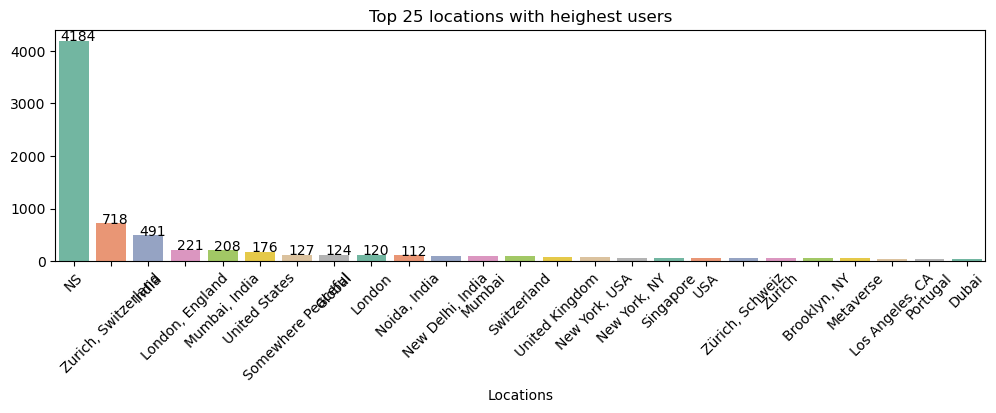

In [82]:
plt.figure(figsize=(12,3))
vc = data.user_location.value_counts()[:25]
g= sns.barplot(x=vc.index, y= vc.values, data=data, palette='Set2')

for i in range(10):
    value = vc[i]
    g.text(y= value -2,x=i +0.125, s=value , color='black',ha='center',fontsize=10)

plt.xticks(rotation=45)
plt.xlabel('Locations')
plt.title('Top 25 locations with heighest users')
plt.savefig('D:/Project/European_banking_crisis/graph/foo.png')
plt.show()  

In [83]:
data.user_name.value_counts()[:25]

emojized.com                                         649
Britany Henry, Master of Science                     150
Crypto Avanza                                        142
Nivya Krishna                                        104
BQ Prime                                              86
No DSA NY 🥀 + #FreeAssange ⚖️                         49
scalper432                                            47
محمد سعيد                                             44
Hackpro1                                              43
CN Wire                                               42
Intuitive Code                                        41
Moneycontrol                                          40
Herrlein                                              38
Business Standard                                     36
TalesFromTheFuture                                    36
ACEMAXX ANALYTICS                                     34
Masum Patidar                                         31
QuickUpdate                    

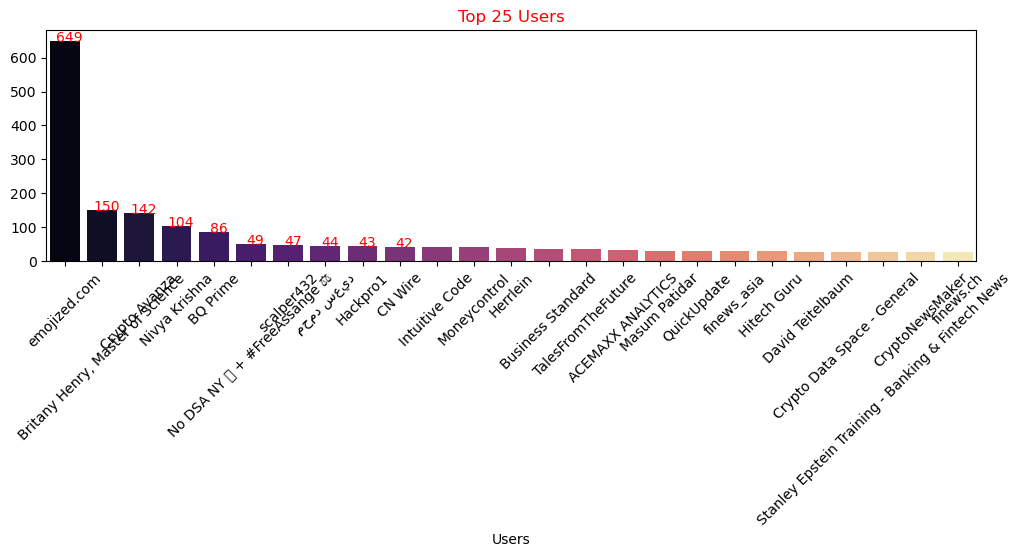

In [84]:
plt.figure(figsize=(12,3))

vc= data.user_name.value_counts()[:25]
g = sns.barplot(x= vc.index , y= vc.values , data= data, palette='magma')

for i in range(10):
    value=vc[i]
    g.text(y=value -2,x=i+0.125,s=value,color='Red',ha='center',fontsize=10)

plt.xlabel('Users')
plt.xticks(rotation=45)
plt.title('Top 25 Users', color='Red')
plt.savefig('D:/Project/European_banking_crisis/graph/foo1.png')
plt.show()    

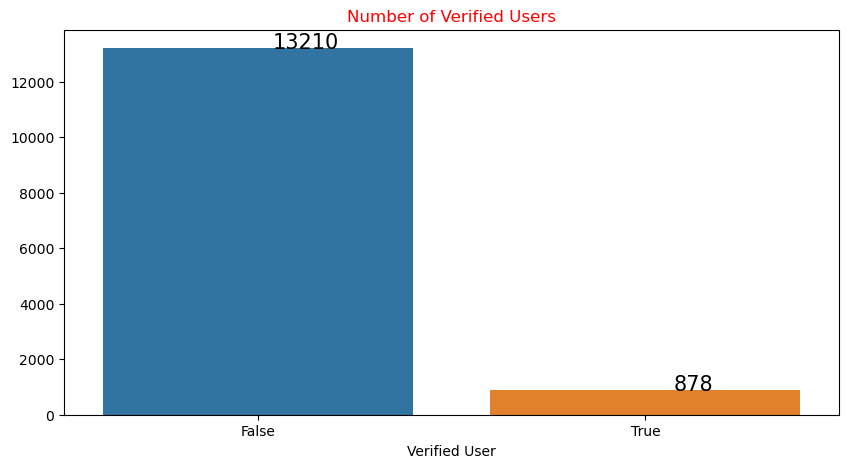

In [85]:
plt.figure(figsize=(10,5))
vc= data.user_verified.value_counts()
g = sns.barplot(x= vc.index , y= vc.values , data= data)

for i in range(2):
    value=vc[i]
    g.text(y=value -2,x=i+0.125,s=value,color='Black',ha='center',fontsize=15)

plt.xlabel('Verified User')
plt.title('Number of Verified Users', color='Red')
plt.savefig('D:/Project/European_banking_crisis/graph/foo11.png')
plt.show()    

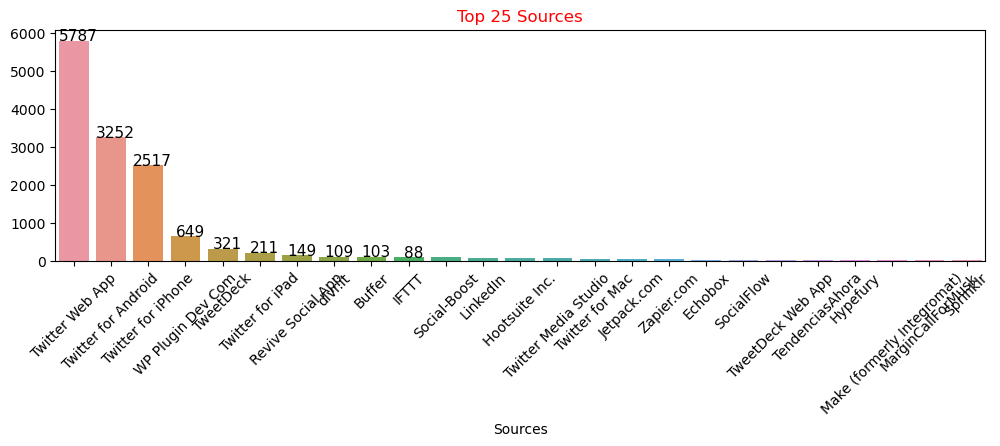

In [86]:
plt.figure(figsize=(12,3))
vc= data.source.value_counts()[:25]
g = sns.barplot(x= vc.index , y= vc.values , data= data)

for i in range(10):
    value=vc[i]
    g.text(y=value -2,x=i+0.125,s=value,color='Black',ha='center',fontsize=11)

plt.xlabel('Sources')
plt.xticks(rotation=45)
plt.title('Top 25 Sources', color='Red')
plt.savefig('D:/Project/European_banking_crisis/graph/foo122.png')
plt.show()

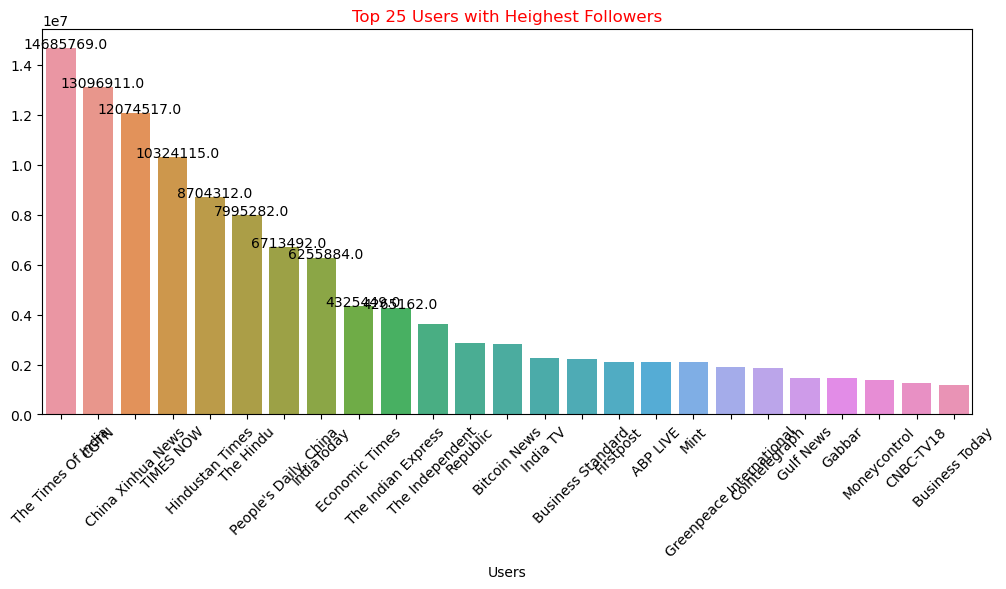

In [87]:
plt.figure(figsize=(12,5))
vc=data.groupby(['user_name'])['user_followers'].max().sort_values(ascending=False)[:25]
g= sns.barplot(x=vc.index, y= vc.values, data=data)
for i in range(10):
    value= vc[i]
    g.text(y= value -2,x= i+0.125, s= value, color='black',ha='center', fontsize=10)

plt.title('Top 25 Users with Heighest Followers',color='Red')
plt.xlabel('Users')
plt.xticks(rotation=45)
plt.savefig('D:/Project/European_banking_crisis/graph/foo1221.png')
plt.show()  

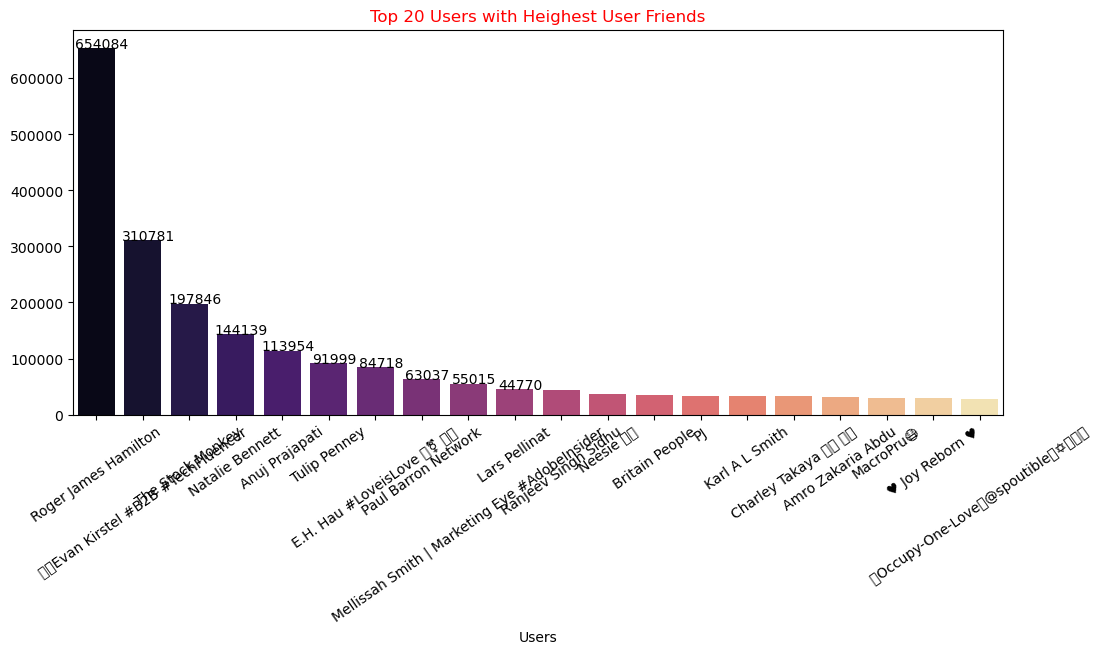

In [88]:
plt.figure(figsize=(12,5))
vc=data.groupby(['user_name'])['user_friends'].max().sort_values(ascending=False)[:20]
g= sns.barplot(x=vc.index, y= vc.values, data=data, palette='magma')
for i in range(10):
    value= vc[i]
    g.text(y= value -2,x= i+0.125, s= value, color='black',ha='center', fontsize=10)

plt.title('Top 20 Users with Heighest User Friends',color='Red')
plt.xlabel('Users')
plt.xticks(rotation=35)
plt.savefig('D:/Project/European_banking_crisis/graph/foo122112.png')
plt.show()   

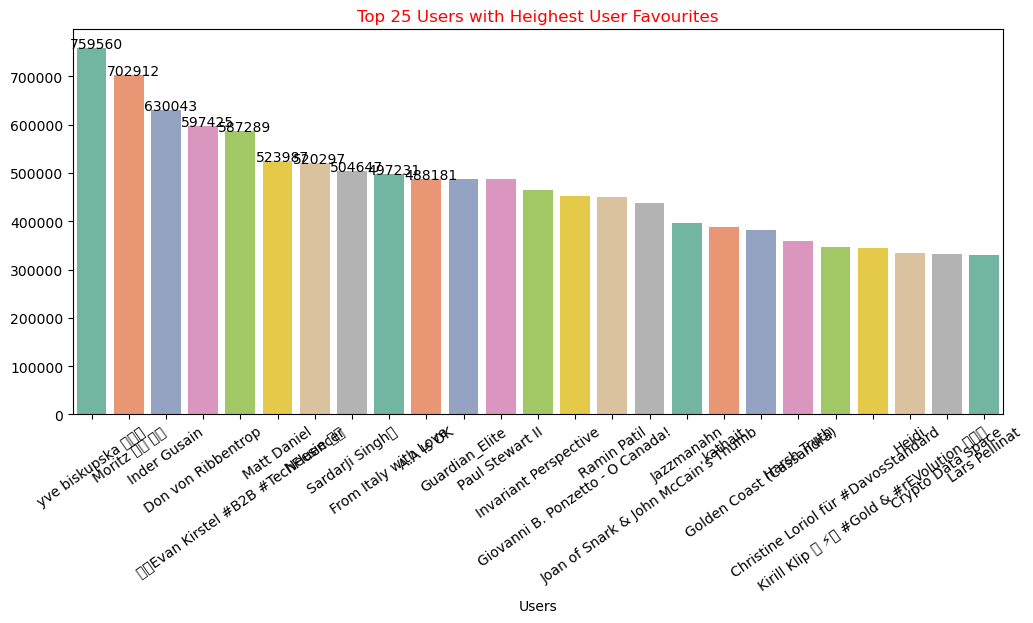

In [89]:
plt.figure(figsize=(12,5))
vc=data.groupby(['user_name'])['user_favourites'].max().sort_values(ascending=False)[:25]
g= sns.barplot(x=vc.index, y= vc.values, data=data, palette='Set2')
for i in range(10):
    value= vc[i]
    g.text(y= value -2,x= i+0.125, s= value, color='black',ha='center', fontsize=10)

plt.title('Top 25 Users with Heighest User Favourites',color='Red')
plt.xlabel('Users')
plt.xticks(rotation=35)
plt.savefig('D:/Project/European_banking_crisis/graph/foo12211ss2.png')
plt.show()